In [1]:
## Homework 3
## Name: Elijah Williams
## Date: 9/18/2022
## Project: simple MNIST classifier network
## Class: NSC3270/5270 Fall 2022

import numpy as np 
import matplotlib.pyplot as plt

# supress some unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# load, display, and format mnist images and labels

In [2]:
from tensorflow.keras.datasets import mnist

# load mnist images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# check dimensions and type of images and labels

print('train')
print(train_images.shape) # Shape of training images = 60,000 x 28 x 28
print(train_labels.shape) # Shape of training lables = 60,000 x ,
print(type(train_images)) # Type of training image = Numpy.ndarray
print(type(train_labels)) # Type of training lables = Numpy.ndarray
print()

print('test') 
print(test_images.shape)  # Shape of training images = 10,000 x 28 x 28
print(test_labels.shape)  # Shape of training lables = 10,000 x 1
print(type(test_images)) 
print(type(test_labels))

train
(60000, 28, 28)
(60000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

test
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


There are 60,000 train images and 10,000 test images. Each image is 28x28 pixels (gray scale).

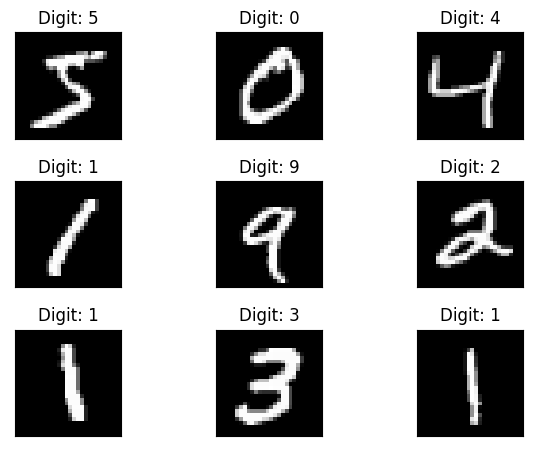

In [4]:
# display the first 9 digits

fig = plt.figure() # Creating a figure
for i in range(9):
    plt.subplot(3,3,i+1)  # adds axes to the figure (nrows,ncols, location index) # Subplots can create multiple subplots at a time (figures and axes)
    # default is plt.subplot(1,1,1)
    plt.tight_layout() # Fixes the padding between the subplots
    plt.imshow(train_images[i], cmap='gray', interpolation='none') # showing the ith 28 x 28 array, using gray color map, with no interpolation
    plt.title("Digit: {}".format(train_labels[i]))
    plt.xticks([]) # Getting rid of xticks
    plt.yticks([]) # Getting rid of yticks
plt.show()


### reformat training and testing images

Training images shape:  (60000, 28, 28)
Training pixel type:    <class 'numpy.uint8'>
Example: 240
Testing images shape:   (10000, 28, 28)
Testing pixel type:     <class 'numpy.uint8'>
Example: 253


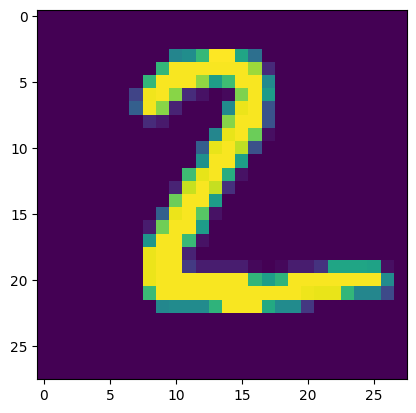

In [5]:
# check out (again) dimensions and types of mnist data
print('Training images shape: ', train_images.shape)
print('Training pixel type:   ', type(train_images[0][0][0])) #uint8 = unsigned 8-bit intger (0-255)
print("Example:", train_images[0][14][14])
print('Testing images shape:  ', test_images.shape)
print('Testing pixel type:    ', type(test_images[0][0][0]))
print("Example:", test_images[1][20][25]) # When indexing multi-dimension arrays, you have to work backwards

# Let's take a look at one of these digits
plt.imshow(test_images[1])
# Notice that these images aren't actually grayscale


In [6]:
# number of images
Ntr = train_images.shape[0]  # Number of training images = 60000
Nts = test_images.shape[0]  # Number of testing images = 10000

# image shape
szx = train_images.shape[1] # This would actually be the length of the y-axis
szy = train_images.shape[2] # This would be lengths of x-axis

# need to reshape the 28x28 training/testing images as vectors
train_images_vec = train_images.reshape((Ntr, szx * szy)) # Reshaping trainings to be 60000 x 784
test_images_vec = test_images.reshape((Nts, szx * szy)) # Reshaping test images to be 10000 x 784

# deciding to normalize the pixels to 0..1 and recase as float32
train_images_vec = train_images_vec.astype('float32') / 255  # Normalizing pixels as values 0 - 1
test_images_vec = test_images_vec.astype('float32') / 255   # 0 is darkest, 1 lightest

# display new input dimensions/type
print('New training images shape: ', train_images_vec.shape)
print('New training pixel type:   ', type(train_images_vec[0][0]))
print('New testing images shape:  ', test_images_vec.shape)
print('New testing pixel type:    ', type(test_images_vec[0][0]))

New training images shape:  (60000, 784)
New training pixel type:    <class 'numpy.float32'>
New testing images shape:   (10000, 784)
New testing pixel type:     <class 'numpy.float32'>


### reformat training and testing labels

In [7]:
# check out dimensions and types of mnist data
print('Training labels shape: ', train_labels.shape)
print('Training labels type:  ', type(train_labels[0]))
print()

# check out what the first 9 labels look like
print("First 9 training labels as labels:\n", train_labels[:9])

Training labels shape:  (60000,)
Training labels type:   <class 'numpy.uint8'>

First 9 training labels as labels:
 [5 0 4 1 9 2 1 3 1]


In [8]:
from tensorflow.keras.utils import to_categorical

# also need to categorically encode the labels as "one hot"

 # converts a list (or matrix) of integers into a list of binary matrix
train_labels_onehot = to_categorical(train_labels) # ex. to_categorical([1,4]) == [[1 0 0 0] [0 0 0 1]]
test_labels_onehot = to_categorical(test_labels) # one-hot encoding come from (for whatever category an digit image falls into, only one of the
# possibilities is a 1, all else is 0 (only one wire is hot))

print("First 9 training labels as one-hot encoded vectors:\n", train_labels_onehot[:9])

First 9 training labels as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
# display new output dimensions/type
print('New training labels shape (one hot): ', train_labels_onehot.shape)
print('New training labels type (one hot):  ', type(train_labels_onehot[0][0]))

New training labels shape (one hot):  (60000, 10)
New training labels type (one hot):   <class 'numpy.float32'>


# define and train neural network

In [10]:
# import tools for basic keras networks 
from tensorflow.keras import models # A model object groups multiple layers into a single class to work with
from tensorflow.keras import layers # A layer consists of a function (vector input, vector output) and weights

nout = 10 # Size of output layer

# create architecture of simple neural network model
# input layer  : 28*28 = 784 input nodes
# output layer : 10 (nout) output nodes
network = models.Sequential() # Sequential model is used for simple neural networks (each layer takes in 1 vector and spits out one vector)

network.add(layers.Dense(nout, # dimension out output space
                         activation='sigmoid',  
                         input_shape=(szx * szy,))) 
                         # Dense is a Neural network layer that does: outputs = activation(inputs x weights + bias)

# print a model summary
print(network.summary())
print()
for layer in network.layers:  # This is a single layer network (keras considers input layer as layer 0)
    print('layer name : {} | input shape : {} | output shape : {}'.format(layer.name, layer.input.shape, layer.output.shape))
print() 

for layer in network.layers:
    print(layer.get_config())
print()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None

layer name : dense | input shape : (None, 784) | output shape : (None, 10)

{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 10, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}



In [11]:
# compile network - setting network up
network.compile(optimizer='sgd',  
                loss='mean_squared_error', 
                metrics=['accuracy'])

# now train the network
history = network.fit(train_images_vec,  # input data
                      train_labels_onehot, # mapping training images vec to one-hot encodings (1's on target, 0's elsewhere)
                      verbose=True, # how much ouput should program print out
                      validation_split=.1, # fraction of the training data not used for training but instead validation
                      epochs=20, # number of iterations over entire dataset
                      batch_size=128) # number of examples run through before gradient is updated
print('Done training!')
print()

Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 0.1438 - accuracy: 0.1662 - val_loss: 0.1043 - val_accuracy: 0.2548
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0970 - accuracy: 0.3217 - val_loss: 0.0909 - val_accuracy: 0.3948
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0887 - accuracy: 0.4312 - val_loss: 0.0854 - val_accuracy: 0.4842
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0844 - accuracy: 0.4876 - val_loss: 0.0816 - val_accuracy: 0.5232
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0810 - accuracy: 0.5157 - val_loss: 0.0784 - val_accuracy: 0.5520
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0781 - accuracy: 0.5374 - val_loss: 0.0755 - val_accuracy: 0.5715
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0755 - accuracy: 0.5562 - val_loss: 0.0729 - val_accuracy: 0.5915
Epoch 

In [12]:
# test network
test_loss, test_acc = network.evaluate(test_images_vec, 
                                       test_labels_onehot, 
                                       verbose=True)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0550 - accuracy: 0.7111
test_acc: 0.7110999822616577


# some pieces needed to complete Homework 3

In [13]:
# get learned network weights and biases

# Get wrights method returns both the kernel (weight matrix) and bias

W = network.layers[0].get_weights()[0]     # weights input to hidden
B = network.layers[0].get_weights()[1]     # bias to hidden

print('W {} | B {}'.format(W.shape, B.shape))

# With shape of an array
# FIrst digit ------>
# Second digit is diagonal    </----
# Third unit is down

W (784, 10) | B (10,)


313/313 [==============================] - 0s 1ms/step
(784,)
(1, 784)
Prediction generated by Sequential Model: [0.09958057 0.02272094 0.13530275 0.08741085 0.1185603  0.1086781
 0.5896418  0.0515166  0.06067162 0.09477238]
Program Guess: 6


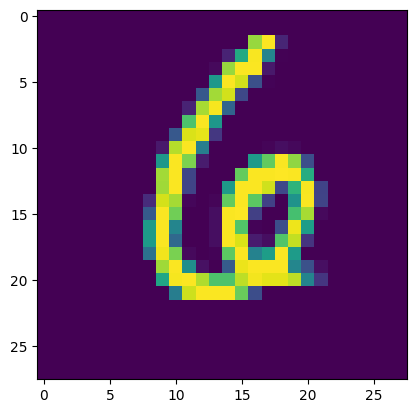

In [14]:
# model predictions (all 10000 test images)
out = network.predict(test_images_vec) # Returns numpy array of predictions

# model predictions (a single test image)
example = test_images_vec[123] 
print(example.shape)

plt.imshow(test_images[123])

# vector passed to network.predict must be (?, 784)
example = example.reshape((1,example.shape[0]))
print(example.shape)

print("Prediction generated by Sequential Model:", out[123]) 
print("Program Guess:",np.argmax(out[123]))


In [15]:
out.shape

(10000, 10)

In [16]:
#########################################################################################
##
## Homework 3 Solution Area
##

## Q1. The original MNIST test_labels numpy array contains the digit value associated
## with the corresponding digit image (test_images). The output from the network (from
## out = network.predict(test_images_vec) above) contains the activations of the 10
## output nodes for every test image presented to the network. Write a function that
## takes the (10000,10) numpy array of output (of type float) activations and returns a 
## (10000,) numpy array of discrete digit classification by the network (of type int).
## Specifically, create a test_decisions numpy array of the same size and type as the
## MNIST test_labels array you started with. Whereas test_labels shows the correct
## answer, test_decisions shows the ultimate decision by the network. Below you will use 
## both arrays to pull out test images that the network classifies correctly vs. incorrectly.
##
## To turn a numpy array of continuous output activations into a discrete digit classification,
## just take the maximum output as the "winner" that "takes all", determining the classification.
##
## In your function, feel free to use for loops. Here, we are looking to see that you understand
## how to use the outputs generated by the network, not whether you can program using the
## most efficient Python style.

### INSERT Q1 SOLUTION HERE ###

def func1(out):
    """Function that takes a list of activations, and returns discrete digit classificaitons"""
    test_decisions = np.zeros(out.shape[0])
    for i in range(len(test_decisions)):
        test_decisions[i] = np.argmax(out[i])

    return test_decisions.astype("int")

# TESTING
test_decisions = func1(out)
print(test_decisions)
print(type(test_decisions[0])) # Making sure its an int

[7 6 1 ... 4 5 6]
<class 'numpy.int32'>


In [17]:
##
## Q2. Comparing the correct answers (test_labels) and network classifications (test_decisions),
## for each digit 0..9, find one test image (test_image) that is classified by the network
## correctly and one test image that is classified by the network incorrectly. 
##
## Create a 2x10 plot of digit images (feel free to adapt the code above that uses subplot), with a 
## column for each digit 0..9 with the first row showing examples correctly classified (one example 
## for each digit) and the second row showing the examples incorrectly classified (one example 
## for each digit). Each subplot title should show the answer and the classification response 
## (e.g., displaying 4/2 as the title, if the correct answer is 4 and the classification was 2).
##

### INSERT Q2 SOLUTION HERE ###


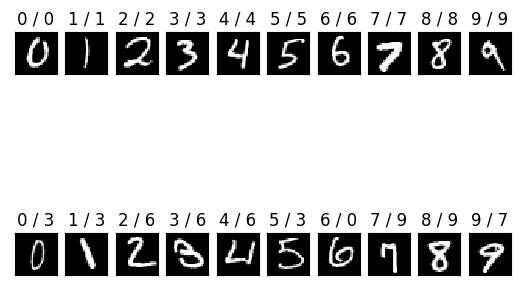

In [18]:
# Finding correct / incorrect indices

right_indices = [] 
wrong_indices = [] 
for i in range(10):
    right_ind = None
    wrong_ind = None

    for j in range(len(test_labels)):
        if test_labels[j] == i:
            if test_decisions[j] == i:
                right_ind = j
            else:
                wrong_ind = j
            if right_ind and wrong_ind:
                break
    
    right_indices.append(right_ind)
    wrong_indices.append(wrong_ind)

# Graphing

fig = plt.figure() # Creating a figure

for i in range(10):
    correct_index = right_indices[i]
    wrong_index = wrong_indices[i]

    plt.subplot(2,10, i + 1)
    plt.imshow(test_images[correct_index],cmap="gray", interpolation="None")
    plt.title(f"{test_labels[correct_index]} / {test_decisions[correct_index]}")
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 10, i + 11)
    plt.imshow(test_images[wrong_index], cmap="gray", interpolation="None")
    plt.title(f"{test_labels[wrong_index]} / {test_decisions[wrong_index]}")
    plt.xticks([])
    plt.yticks([])

plt.show()

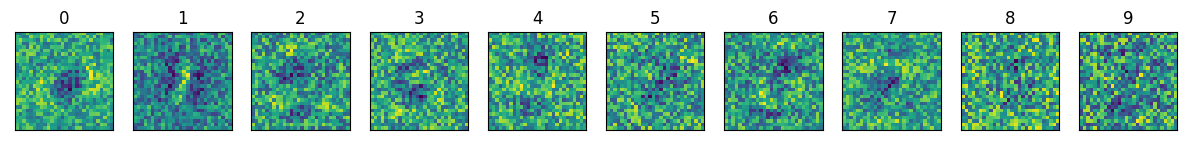

In [19]:
##
## Q3. Create "images" of the connection weight adapting the code used to display
## the actual digit images. There should be 10 weight images, an image for each
## set of weight connecting the input layer (784 inputs) to each output node.
## You will want to reshape the (784,1) vector of weights to a (28,28) image and
## display the result using imshow()

### INSERT Q3 SOLUTION HERE ###

W = network.layers[0].get_weights()[0]     # weights input to hidden

fig = plt.figure(figsize=(10*1.5, 4.8)) # Creating a figure

for i in range(10):
    plt.subplot(2,10, i + 1)
    plt.imshow(np.reshape(W[:,i], (28,28)), interpolation="None")
    plt.title(f"{i}")
    plt.xticks([])
    plt.yticks([])
plt.show()

# Notice how you can see outlines of the shape in the weights


In [25]:
##
## Q4. Use the weight matrix (W), bias vector (B), and activation function (simple sigmoid)
## to reproduce in your own code the outputs (out) generated by the network (from
## this out = network.predict(test_images_vec))
##
## The simple sigmoid activation function is defined as follows:
## f(x) = 1 / (1+exp(-x))
##
## Confirm that your output vectors and the keras-produced output vectors are the same
## (within some small epsilon since floating point calculations will often not come out
## exactly the same on computers).
##

### INSERT Q4 SOLUTION HERE ###

def activate(test_image_vec):
    activations = np.zeros(10)
    for i in range(10):
        activations[i] = temp_act = 1 / (1+np.exp(-(np.dot(test_image_vec, W[:,i]) + B[i]))) 
    return activations

def my_predict(test_images_vec):
    my_outs = [activate(i) for i in test_images_vec]
    return my_outs

# Getting outputs
my_outs = my_predict(test_images_vec)

# Confirmation
print(np.linalg.norm(my_outs - out)) # Should be small

for i in range(len(test_images_vec)):
    if np.linalg.norm(my_outs[i] - out[i]) > .00001:
        print(i,"ALERT")






7.128494801661963e-06
